# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [34]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [35]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [36]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [37]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [38]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [39]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [40]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [41]:
df_train.head(5)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f


(753, 2)

In [42]:
df_test.head(5)
df_test.shape


,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [43]:
def preprocess_text(text):
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    return text


### Let's check the male to female ratio in the entries:

In [44]:
def calculate_ratio(df, show_size=True):
    genderNum = df.groupby('gender').size()
    if(show_size):
        genderNum
    return genderNum[1] / genderNum[0]


calculate_ratio(df_train)

3.230337078651685

### We can see that the ratio is quite big, so we can try to reduce it to avoid bias

In [45]:
def fix_male_female_ratio(df_train, ratio_limit = 1.5, limit = 5, value_to_drop = 'm'):
    # Make a copy of the dataframe
    df_train_copy = df_train.copy()

    # Calculate current ratio

    male_female_ratio = calculate_ratio(df_train_copy)
    print(f'Ratio: {male_female_ratio}')

    # Dropping multiple 'male' entries to make the ratio more equal
    value_to_drop = 'm'
    while (male_female_ratio > ratio_limit):
        # Drop random 
        indices_to_drop = df_train_copy[(df_train_copy['gender'] == value_to_drop)].sample(
            n=limit, random_state=42).index
        df_train_copy.drop(indices_to_drop, inplace=True)

        # Calculate current ratio
        male_female_ratio = calculate_ratio(df_train_copy, show_size=False)

    print(f'Ratio after loop: {male_female_ratio}')
    male_female_ratio = calculate_ratio(df_train_copy)

    return df_train_copy


### The data had a big ratio bias towards male entries, so we removed until the ratio will be better

In [46]:
def average_f1(y_true, y_pred):
    f1_male = f1_score(y_true, y_pred, pos_label='m')
    f1_female = f1_score(y_true, y_pred, pos_label='f')
    return (f1_male + f1_female) / 2

In [51]:
# Initialize the classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'LinearSVC': LinearSVC(),
    'MLPClassifier': MLPClassifier(),
    'Perceptron': Perceptron(),
    'SGDClassifier': SGDClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [52]:
def predict_gender(df_train, df_test):
    # Preprocess the text in the training and test data
    df_train['story'] = df_train['story'].apply(preprocess_text)
    df_test['story'] = df_test['story'].apply(preprocess_text)

    df_train['word_count'] = df_train['story'].apply(lambda x: len(x.split()))
    df_test['word_count'] = df_test['story'].apply(lambda x: len(x.split()))

    # df_train['avg_word_length'] = df_train['story'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
    # df_test['avg_word_length'] = df_test['story'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))


    # Vectorize the text using TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(df_train['story'])
    y_train = df_train['gender']

    # Split the training data for validation
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    f1_scores = {}

    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(X_train_split, y_train_split)

        # Predict on validation data
        y_val_pred = classifier.predict(X_val_split)

        # Calculate f1 scores
        f1_male = f1_score(y_val_split, y_val_pred, pos_label='m')
        f1_female = f1_score(y_val_split, y_val_pred, pos_label='f')
        average_f1 = (f1_male + f1_female) / 2

        # Save f1_scores to understand what is the best classifier
        f1_scores[classifier_name] = average_f1

        print(f"{classifier_name} - Average f1 score: {average_f1}")

        # Perform cross-validation
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1_macro')
        cv_scores_mean = cv_scores.mean()

        print(f"{classifier_name} - Cross-validation f1_macro scores: {cv_scores}")
        print(f"{classifier_name} - Mean cross-validation f1_macro score: {cv_scores_mean}")

        # Retrain the model on the entire training data
        classifier.fit(X_train, y_train)

        # Vectorize the test data
        X_test = vectorizer.transform(df_test['story'])

        # Predict on test data
        y_test_pred = classifier.predict(X_test)

        # Show the predictions of the first 5 examples and the last 5 examples of the test data
        print(f"{classifier_name} - First 5 predictions:")
        print(y_test_pred[:5])

        print(f"{classifier_name} - Last 5 predictions:")
        print(y_test_pred[-5:])
        print("\n---------------------------------------------\n")


    colors = ['blue', 'green', 'orange', 'red', 'purple']
    classifier_names = list(f1_scores.keys())
    scores = list(f1_scores.values())

    # Plot the F1 scores
    plt.bar(classifier_names, scores, color=colors)
    plt.xlabel('Classifier')
    plt.ylabel('Average F1 Score')
    plt.title('Average F1 Scores for Different Classifiers')
    plt.xticks(rotation=45)
    plt.show()
    
    return f1_scores


Ratio: 3.230337078651685
Ratio after loop: 0.9831460674157303
Iteration number 1.0
Ratio: 3.230337078651685
Ratio after loop: 0.9831460674157303
MultinomialNB - Average f1 score: 0.5678260869565217
MultinomialNB - Cross-validation f1_macro scores: [0.62234043 0.73106061 0.57521368 0.71550802 0.65561497]
MultinomialNB - Mean cross-validation f1_macro score: 0.6599475402917205
MultinomialNB - First 5 predictions:
['m' 'm' 'f' 'f' 'f']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6900793650793651
LinearSVC - Cross-validation f1_macro scores: [0.59919355 0.71780604 0.61941632 0.69993876 0.6713615 ]
LinearSVC - Mean cross-validation f1_macro score: 0.6615432348640938
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.6895866454689984
MLPClassifier - Cross-vali

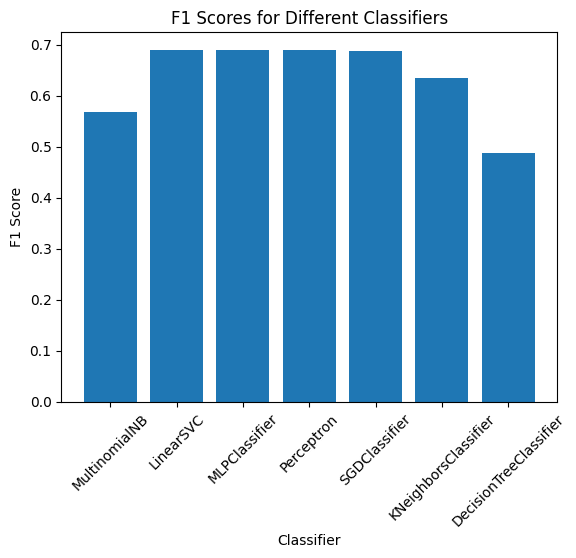

Iteration number 2.000000000000001
Ratio: 3.230337078651685
Ratio after loop: 1.095505617977528
MultinomialNB - Average f1 score: 0.58169799628176
MultinomialNB - Cross-validation f1_macro scores: [0.61734694 0.61244019 0.57693056 0.59916667 0.63755102]
MultinomialNB - Mean cross-validation f1_macro score: 0.6086870750990097
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.7023809523809524
LinearSVC - Cross-validation f1_macro scores: [0.63768116 0.71920128 0.63348416 0.73744164 0.69717262]
LinearSVC - Mean cross-validation f1_macro score: 0.6849961736678215
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.7819767441860466
MLPClassifier - Cross-validation f1_macro scores: [0.62606838 0.67857143 0.63

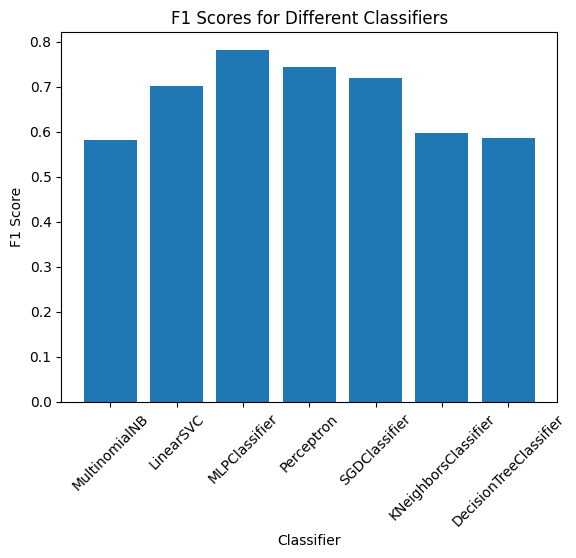

Iteration number 3.0000000000000018
Ratio: 3.230337078651685
Ratio after loop: 1.1797752808988764
MultinomialNB - Average f1 score: 0.3275862068965517
MultinomialNB - Cross-validation f1_macro scores: [0.37377342 0.43589744 0.43589744 0.37745438 0.46778149]
MultinomialNB - Mean cross-validation f1_macro score: 0.41816083194200554
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6585858585858586
LinearSVC - Cross-validation f1_macro scores: [0.67032967 0.72713643 0.65202471 0.73001403 0.72695035]
LinearSVC - Mean cross-validation f1_macro score: 0.701291038054777
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.6585858585858586
MLPClassifier - Cross-validation f1_macro scores: [0.65103563 0.67688484 

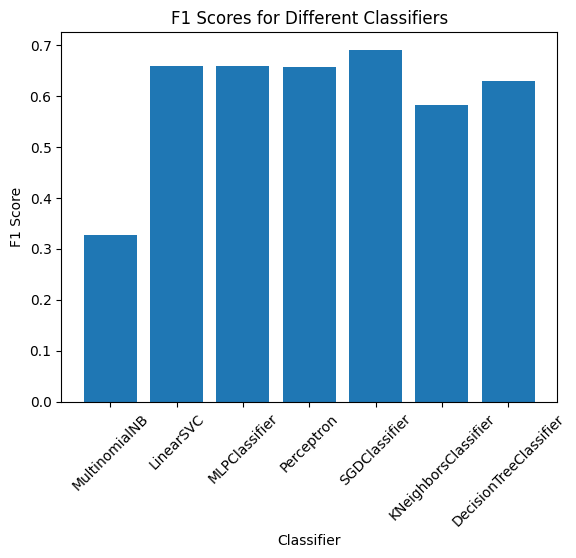

Iteration number 4.0
Ratio: 3.230337078651685
Ratio after loop: 1.2921348314606742
MultinomialNB - Average f1 score: 0.38923175143647587
MultinomialNB - Cross-validation f1_macro scores: [0.35433071 0.38923175 0.38923175 0.36220472 0.42205405]
MultinomialNB - Mean cross-validation f1_macro score: 0.3834105979995744
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6907689785210691
LinearSVC - Cross-validation f1_macro scores: [0.6798959  0.74644403 0.66908797 0.66666667 0.69979784]
LinearSVC - Mean cross-validation f1_macro score: 0.6923784835539047
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.7445482866043613
MLPClassifier - Cross-validation f1_macro scores: [0.63409755 0.70091185 0.60576923 0.6

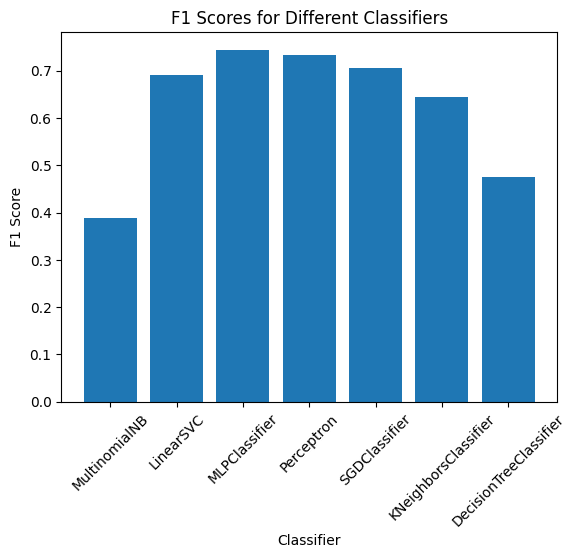

Iteration number 5.000000000000002
Ratio: 3.230337078651685
Ratio after loop: 1.3764044943820224
MultinomialNB - Average f1 score: 0.35114503816793896
MultinomialNB - Cross-validation f1_macro scores: [0.36567164 0.36567164 0.36567164 0.36842105 0.36842105]
MultinomialNB - Mean cross-validation f1_macro score: 0.36677140612725845
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6700822853594163
LinearSVC - Cross-validation f1_macro scores: [0.68596059 0.73520249 0.67008229 0.68677966 0.65545529]
LinearSVC - Mean cross-validation f1_macro score: 0.6866960641887043
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.6964757025306629
MLPClassifier - Cross-validation f1_macro scores: [0.66995221 0.70998368

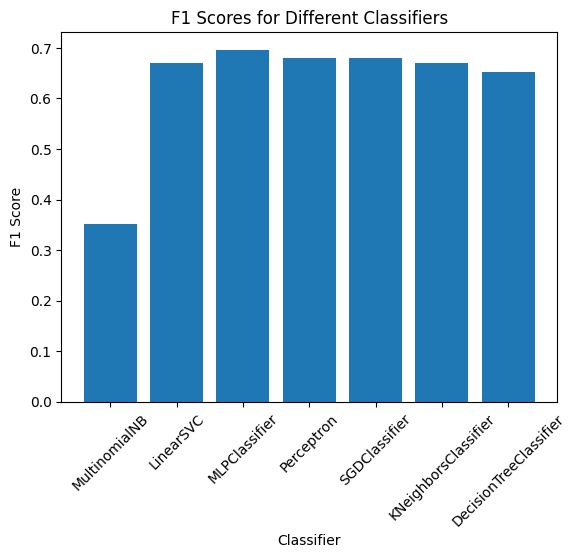

Iteration number 6.0
Ratio: 3.230337078651685
Ratio after loop: 1.4887640449438202
MultinomialNB - Average f1 score: 0.3597122302158274
MultinomialNB - Cross-validation f1_macro scores: [0.37323944 0.37323944 0.37323944 0.37588652 0.37588652]
MultinomialNB - Mean cross-validation f1_macro score: 0.37429827190090903
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6782536151279199
LinearSVC - Cross-validation f1_macro scores: [0.64478936 0.68309358 0.62783751 0.62760417 0.64647276]
LinearSVC - Mean cross-validation f1_macro score: 0.6459594754664661
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.6419540229885058
MLPClassifier - Cross-validation f1_macro scores: [0.69310345 0.66330391 0.64478936 0.6

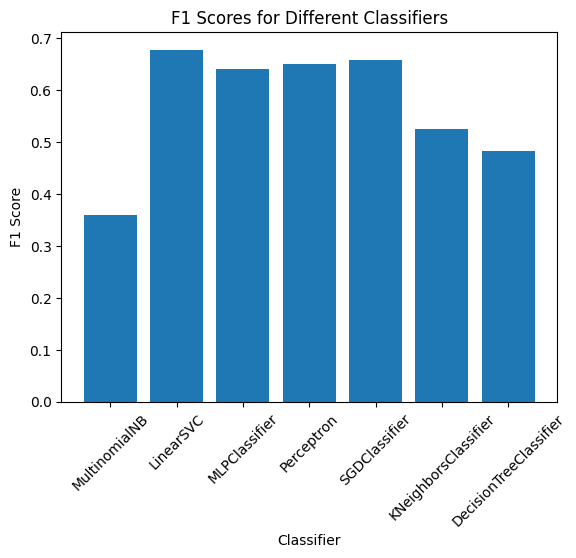

Iteration number 7.000000000000001
Ratio: 3.230337078651685
Ratio after loop: 1.5730337078651686
MultinomialNB - Average f1 score: 0.36986301369863017
MultinomialNB - Cross-validation f1_macro scores: [0.37837838 0.37837838 0.37837838 0.38095238 0.38095238]
MultinomialNB - Mean cross-validation f1_macro score: 0.3794079794079794
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6314408067412627
LinearSVC - Cross-validation f1_macro scores: [0.63304843 0.68813559 0.63304843 0.61276596 0.63098135]
LinearSVC - Mean cross-validation f1_macro score: 0.6395959526147654
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.6068376068376068
MLPClassifier - Cross-validation f1_macro scores: [0.63379036 0.71797947 

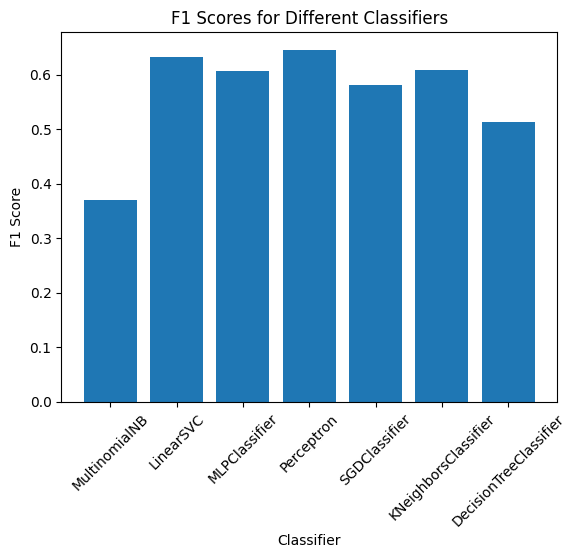

Iteration number 8.000000000000002
Ratio: 3.230337078651685
Ratio after loop: 1.6853932584269662
MultinomialNB - Average f1 score: 0.3642384105960265
MultinomialNB - Cross-validation f1_macro scores: [0.38461538 0.38461538 0.38461538 0.38709677 0.38709677]
MultinomialNB - Mean cross-validation f1_macro score: 0.38560794044665014
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.5962788326749077
LinearSVC - Cross-validation f1_macro scores: [0.65714286 0.64816072 0.6128494  0.59842995 0.63601533]
LinearSVC - Mean cross-validation f1_macro score: 0.6305196492582015
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.5966386554621848
MLPClassifier - Cross-validation f1_macro scores: [0.59148936 0.71861858 

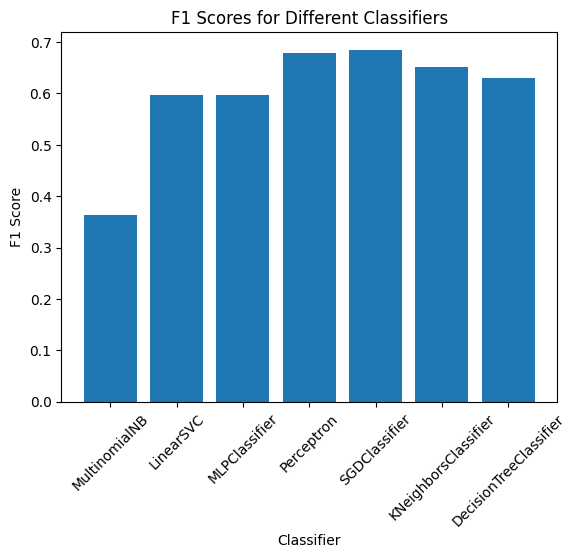

Iteration number 9.0
Ratio: 3.230337078651685
Ratio after loop: 1.797752808988764
MultinomialNB - Average f1 score: 0.38271604938271603
MultinomialNB - Cross-validation f1_macro scores: [0.3902439  0.3902439  0.3902439  0.39263804 0.39263804]
MultinomialNB - Mean cross-validation f1_macro score: 0.391201556187341
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.75669099756691
LinearSVC - Cross-validation f1_macro scores: [0.66216216 0.66216216 0.58881579 0.58300654 0.59894974]
LinearSVC - Mean cross-validation f1_macro score: 0.6190192774360159
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.7051539096591579
MLPClassifier - Cross-validation f1_macro scores: [0.58881579 0.64485033 0.58102446 0.61176

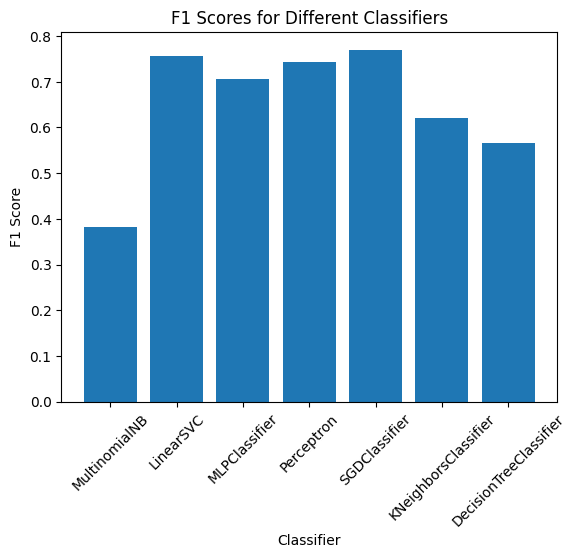

Iteration number 10.000000000000002
Ratio: 3.230337078651685
Ratio after loop: 1.8820224719101124
MultinomialNB - Average f1 score: 0.36809815950920244
MultinomialNB - Cross-validation f1_macro scores: [0.39411765 0.39411765 0.39411765 0.3964497  0.3964497 ]
MultinomialNB - Mean cross-validation f1_macro score: 0.39505046989209885
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Average f1 score: 0.6076190476190476
LinearSVC - Cross-validation f1_macro scores: [0.6742568  0.66558442 0.56649832 0.56534091 0.59431818]
LinearSVC - Mean cross-validation f1_macro score: 0.6131997244971628
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'm']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Average f1 score: 0.5997880607559167
MLPClassifier - Cross-validation f1_macro scores: [0.58016304 0.5960784

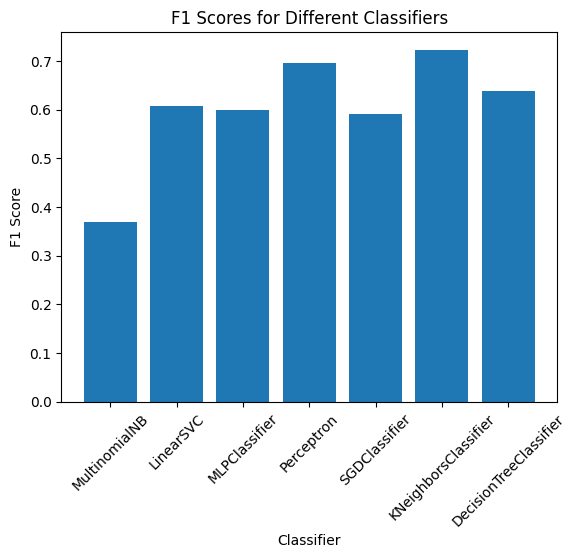

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Measuring by average f1 score:

Current Male:Female ratio: 1.095505617977528
Best classifier: MLPClassifier
Best average f1_score: 0.7819767441860466


In [53]:
best_classifier = ''
best_f1_score = 0

best_ratio = 0
best_macro_ratio = 0

df_train_copy = fix_male_female_ratio(df_train, ratio_limit=1)

for x in (x * 0.1 for x in range(10, 20)):
    print(f"Iteration number {((x - 1) * 10) + 1}")
    df_train_copy = fix_male_female_ratio(df_train, ratio_limit=x)

    current_ratio = calculate_ratio(df_train_copy, False)

    f1_scores = predict_gender(df_train_copy, df_test)

    current_best_classifier = max(f1_scores, key=f1_scores.get)
    current_best_f1_score = f1_scores[current_best_classifier]

    if (current_best_f1_score > best_f1_score):
        best_classifier = current_best_classifier
        best_f1_score = current_best_f1_score
        best_ratio = current_ratio

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

print("Measuring by average f1 score:\n")
print(f"Current Male:Female ratio: {best_ratio}")
print(f"Best classifier: {best_classifier}")
print(f"Best average f1_score: {best_f1_score}")


In [ ]:
# Find the best classifier object
best_classifier_object = classifiers[best_classifier]

# Train the classifier
vectorizer = TfidfVectorizer()
X_train_all_vec = vectorizer.fit_transform(df_train['story'])
X_test_vec = vectorizer.transform(df_test['story'])

# Predict on validation data
best_classifier_object.fit(X_train_all_vec, df_train['gender'])
y_test_pred = best_classifier_object.predict(X_test_vec)

# Save predictions
df_predicted = df_test.copy()
df_predicted.shape
df_predicted['predicted_category'] = y_test_pred
df_predicted = df_predicted.drop(columns=['story'])


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)

In [ ]:
df_predicted
